<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220827_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-평균 군집화
 - 비지도 학습의 대표 알고리즘
 - 목표 변수가 없는 상태에서 데이터를 비슷한 유형끼리 묶는 머신러닝 기법
 - K-최근접 이웃 알고리즘처럼 거리기반으로 작동하며 K값은 사용자가 지정
 - 고객분류 및 피처 엔지니어링 용도로 사용

# 데이터들을 비슷한 속성끼리 분류
 - 알고리즘 : K-Means Clustering
 - 문제유형 : 비지도학습
 - 평가지표 : 엘보우기법, 실루엣점수
 - 사용모델 : KMeans

## K-평균 군집화 맛보기 : 인위적으로 만든 데이터셋

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'http://raw.githubusercontent.com/musthave-ML10/data_source/main/example_cluster.csv'
data = pd.read_csv(file_url)

In [2]:
data

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


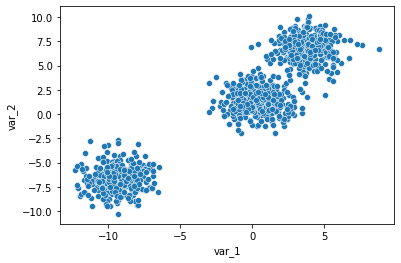

In [3]:
sns.scatterplot(x='var_1', y='var_2', data=data)

 - 눈으로 봤을 때 3그룹으로 나눠야 할 것 같음

### 연습용 데이터 모델링 및 평가

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans_model = KMeans(n_clusters=3, random_state=100) # 모델 생성

In [6]:
kmeans_model.fit(data) # 모델 훈련

KMeans(n_clusters=3, random_state=100)

In [7]:
kmeans_model.predict(data) # 예측

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [8]:
data['label'] = kmeans_model.predict(data) # 예측값을 label로 저장

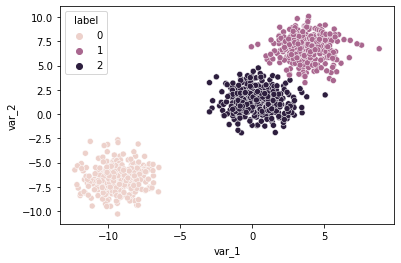

In [9]:
sns.scatterplot(x='var_1', y='var_2', data=data, hue='label');

### 엘보우 기법으로 최적의 K값 구하기
 - 사람의 눈에 의존해서 적절한 K값을 찾는 데 한계가 있음
 - 각 그룹의 중심과 각 그룹의 데이터 간의 거리에 대한 합(이너셔 또는 관성)이 작도록 분류
 - 문제는 K값이 커지면 거리의 합인 이너셔는 당연히 작아지므로 유의미한 클러스터를 만드는 것이 중요

In [10]:
kmeans_model.inertia_ # 이너셔 확인

3090.03323707666

In [11]:
distance = [] # 빈 리스트 생성
for k in range(2, 10):
    k_model = KMeans(n_clusters=k) # 모델 객체 생성
    k_model.fit(data) # 학습
    distance.append(k_model.inertia_)

In [12]:
distance # K값이 2부터 9일때까지의 이너셔 값들

[9908.551424778394,
 3090.03323707666,
 2720.909146857478,
 2396.092385365085,
 2070.543513221915,
 1812.9794773432968,
 1596.8309658103185,
 1370.9063867525633]

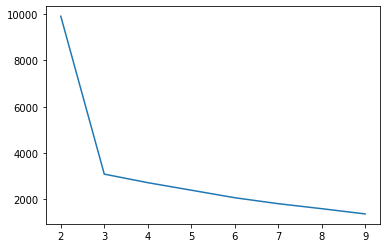

In [13]:
sns.lineplot(x=range(2, 10), y=distance);

 - distance가 급격히 줄어드는 K값을 포착하여 최적의 K값을 찾도록 해주는 엘보우 기법

## 데이터 불러오기 및 데이터 확인 : 고객 데이터셋

In [14]:
file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer.csv'
customer = pd.read_csv(file_url)

In [15]:
customer.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


 - cc_num : 카드번호
 - amt : 거래금액

In [16]:
customer['cc_num'].nunique() # 고객 수

100

In [17]:
customer['category'].nunique() # 범주 수

11

## 전처리 : 피처 엔지니어링
 - 범주별 금액 계산을 위해 category 변수를 더미 변수로 변환

In [18]:
customer_dummy = pd.get_dummies(customer, columns=['category']) # 더미변수로 변환

In [19]:
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


 - 범주별로 얼마만큼의 금액을 썼는지를 계산하기 위해, 더미변수로 변환된 영역에 amt 변수의 값을 곱한다

In [20]:
cat_list = customer_dummy.columns[2:]

In [ ]:
# df.apply(lambda x: ~ , axis=1) 사용방법
# 1. df에 apply(func) 적용시 몇가지 col을 사용하는 경우(df를 func의 파라미터로 받는다)
# 2. row별로 순차적으로 적용하는 경우(def func(x):이 아닌 lambda x:를 사용)
customer_dummy.apply(lambda x: x['amt'] * x[cat_list], axis=1) # 계산시간이 너무 오래걸림

In [22]:
for i in cat_list:
    customer_dummy[i] *= customer_dummy['amt']

In [23]:
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [26]:
customer_agg = customer_dummy.groupby('cc_num').sum()
# customer_dummy.groupby('cc_num').agg('sum') # 결과 동일

 - groupby('컬럼명') .sum()과 .agg('집계함수명') 차이

 > groupby([컬럼명1,컬럼명2])이후 바로 집계함수를 사용하여 모든 컬럼에 대해 일괄 적용할 수 있음

 > groupby([컬럼명1,컬럼명2]).agg({계산하고싶은컬럼명1 : 집계함수 , 계산하고싶은컬럼명2 : 집계함수}) : 컬럼명 별로 별도로 집계함수를 사용할 수 있음

In [27]:
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


 - K-평균 군집화는 거리 기반 알고리즘 → 데이터의 스케일에 큰 영향을 받음 → StandardScaler적용

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(customer_agg) # 스케일링시 인덱스와 컬럼명은 무시된채 데이터만 스케일링
scaled_df = pd.DataFrame(scaled,
                         columns = customer_agg.columns,
                         index = customer_agg.index)

In [29]:
scaled

array([[-1.40232671, -1.13561684, -0.97106905, ..., -1.07025953,
        -1.14142374, -0.61993021],
       [ 1.07940687,  0.41407488,  0.16887956, ...,  1.80734981,
         0.65996745, -0.22258695],
       [ 1.20015148,  0.74712739,  1.62296823, ...,  0.12782479,
         1.29993842,  2.7668909 ],
       ...,
       [-1.10768846, -0.9265974 , -1.1902022 , ..., -0.97473624,
        -0.66458252,  0.19333459],
       [-0.94081475, -0.80789527, -1.09326659, ..., -0.89572163,
        -0.70809415,  0.95453742],
       [ 0.59998262,  0.97669101,  0.61115793, ..., -0.39803373,
        -0.02063061, -0.08679376]])

In [32]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


 - 평균(다른 고객과 비슷한 수준)에 가까울수록 0에 근접
 - 더 큰 금액을 사용한 경우 더 큰 양수

## 고객 데이터 모델링 및 실루엣 계수
 - 적절한 K값을 전혀 예상할 수 없기 때문에 엘보우 기 사용

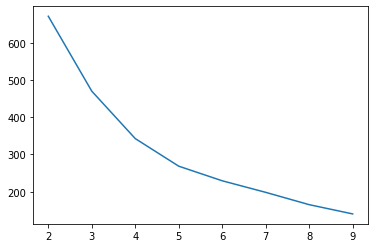

In [37]:
distance = []
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)

    distance.append(k_model.inertia_) # 각 그룹의 중심으로 부터 해당 그룹의 모든데이터 까지의 거리 합

sns.lineplot(x=range(2, 10), y=distance);

 - K값을 결정하기 상당히 어려운 모양새 : 실제 프로젝트에서 빈번
 - 이에 대한 대안으로 **실루엣 계수 사용**

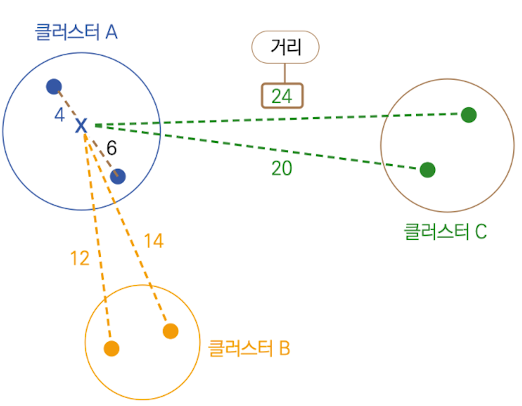

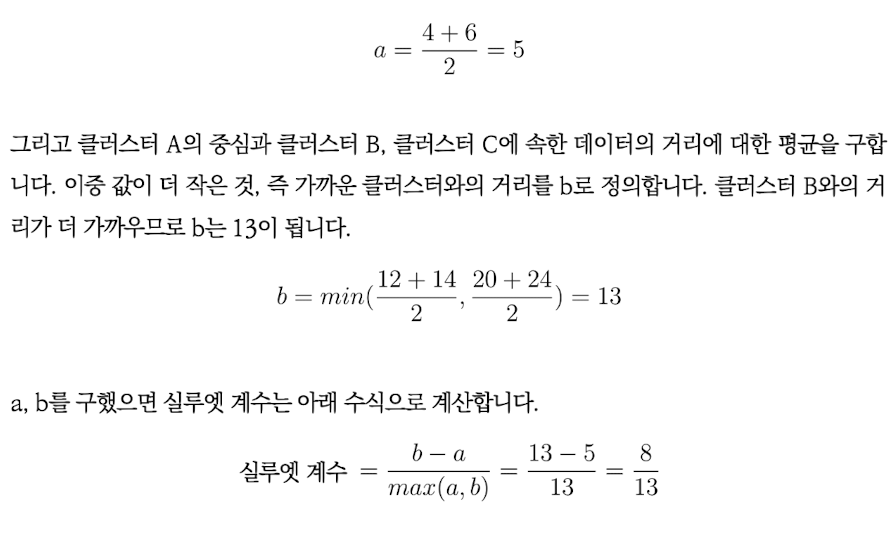

실루엣 계수가 클수록 더 좋은 분류를 의미

In [38]:
from sklearn.metrics import silhouette_score

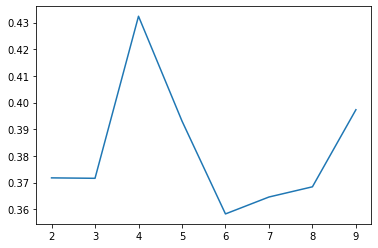

In [43]:
silhouette = [] # 클수록 더 좋은 분류를 의미
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels)) # 원본데이터, 그 예측값

sns.lineplot(x=range(2, 10), y=silhouette);

 - K=4일때 가장좋은 분류 성능
 - 가장 큰 단점 : 계산 비용이 상대적으로 크다(기본적으로 엘보우 기법을 사용하자)

 ## 최종 예측 모델 및 결과 해석

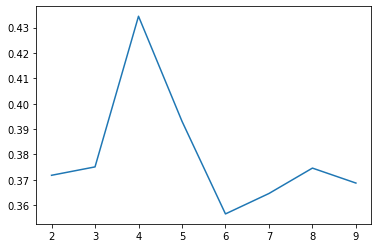

In [46]:
silhouette = [] # 클수록 더 좋은 분류를 의미
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels)) # 원본데이터, 그 예측값


sns.lineplot(x=range(2, 10), y=silhouette);

# K값을 찾았으면 해당 값을 넣어 다시 모델링 하여 레이블을 구하자
import numpy as np
K = np.argmax(silhouette) + 2 # 리스트의 최대값을 갖는 때의 인덱스 : 2
k_model = KMeans(n_clusters=K)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [47]:
scaled_df['label'] = labels # 예측값을 데이터에 붙여줌

 - label별로 전체 및 범주 금액의 평균 값 확인
 - label별로 몇 명의 고객이 있는지 확인 

In [50]:
scaled_df_mean = scaled_df.groupby('label').mean() # label별, 범주별 평균값
scaled_df_count = scaled_df.groupby('label').count()['category_travel'] # label별, 범주 등장 횟수

In [52]:
scaled_df_mean['category_travel'].head()

label
0   -0.264410
1   -0.266604
2    3.050970
3   -0.262740
Name: category_travel, dtype: float64

In [59]:
scaled_df_count = scaled_df_count.rename('count')

In [60]:
scaled_df_all = scaled_df_mean.join(scaled_df_count) # join() : 인덱스를 기준으로 합침

In [61]:
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
1,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10


## 이해하기 : K-평균 군집화

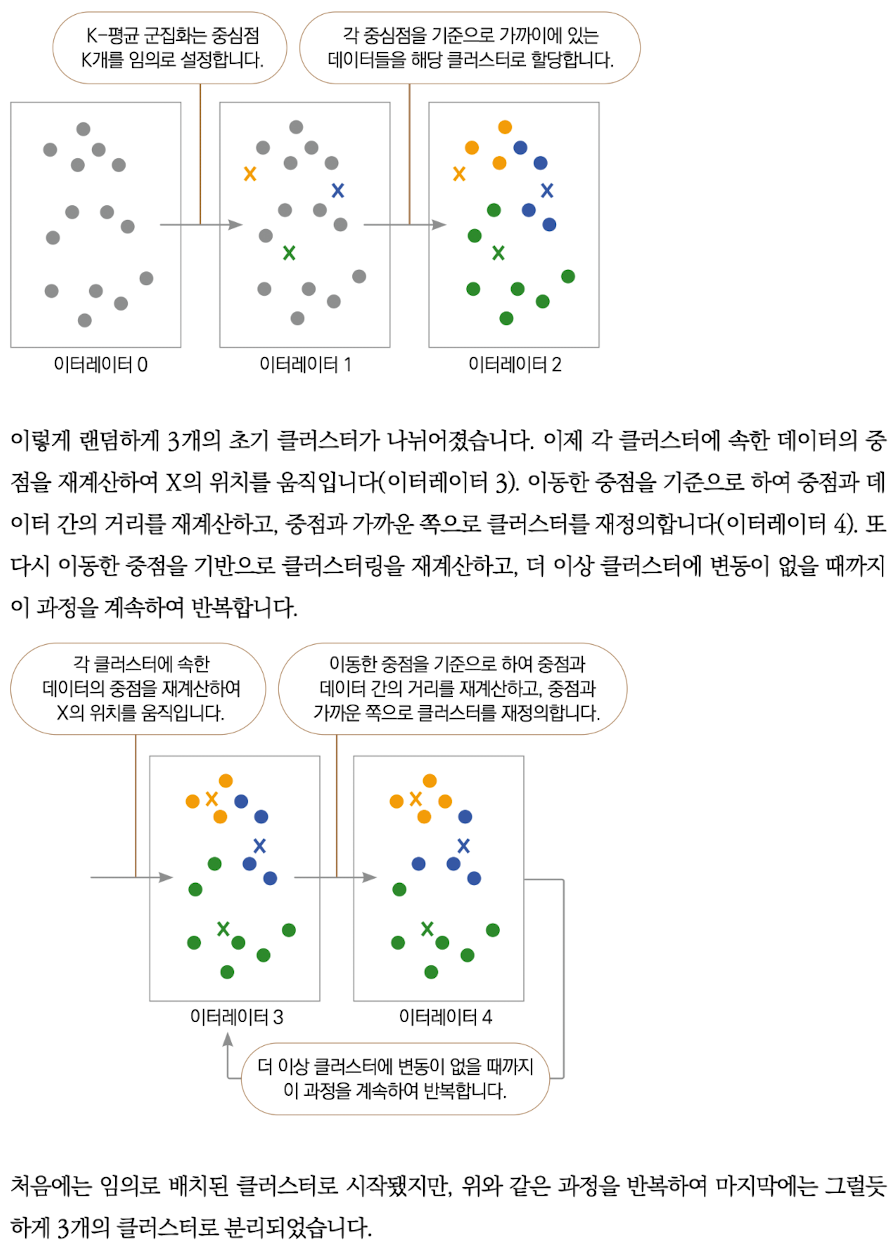